# Lecture 1A - `numpy` Crash Course

## Goals
* Know the basics of working with multidimensional arrays in `numpy`:
  * Know the basics of creation and manipulation of numerical arrays with numpy.
  * Know how to work with multidimensional arrays, including indexing, slicing, operations along axes, and boolean indexing/masking
  * Know the basics of how multidimensional array operations are broadcast across singleton dimensions.


## Code along!

If you have a computer with you:
1. Install `uv`: See <https://docs.astral.sh/uv/getting-started/installation/>
    * If you're on Windows, I recommend using the Linux approach under WSL.
2. Clone the Lectures repository from github: <https://github.com/cs1053-26w/Lectures>
    * This link is also available on the course webpage, just above the Schedule.
3. Change to the repo's root directory (e.g., `cd Lectures`)
4. Start a Jupyter server: `uv run jupyter lab`. A browser window should open up when it's ready.
5. In the Jupyter lab file browser, open the `notebooks` folder and open this notebook (L01B_numpy_images.ipynb).

If you don't have a computer with you, feel free to pair up with someone who does and follow along!

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio.v3 as imageio

### Creating Arrays
* `array`, `zeros`, `ones`, `*_like`
  * `dtype` argument

In [4]:
# create a list
numbers = list(range(8))
numbers

[0, 1, 2, 3, 4, 5, 6, 7]

In [6]:
# turn it into a numpy array
arr = np.array(numbers)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [7]:
# index into the array
arr[4]

np.int64(4)

In [8]:
# check the shape of the array
arr.shape

(8,)

### Basic list-like slicing

In [9]:
# slice a subarray
arr[2:4]

array([2, 3])

In [10]:
# implicit range start
arr[:4]

array([0, 1, 2, 3])

In [11]:
# implicit range end
arr[4:]

array([4, 5, 6, 7])

In [12]:
# slice the whole thing - creates a copy!
arr[:]

array([0, 1, 2, 3, 4, 5, 6, 7])

### Elementwise Operations
* array/scalar, array/array

In [13]:
# array + scalar
arr + 4

array([ 4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
# array + array
arr + arr

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [15]:
# scalar * array
2 * arr

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [16]:
# errors if shapes don't match
arr + arr[:4]

ValueError: operands could not be broadcast together with shapes (8,) (4,) 

### Demo: Speed Check


numpy is faster. How much faster?

In [17]:
# create a list of 1 million random floats between 0 and 1:
N = 1_000_000
originals = []
for _ in range(N):
    originals.append(random.random())

# make a copy of each so memory allocations aren't slowing us down:
result_py = originals[:]
result_np = np.array(originals[:])

In [18]:
%%time
# how long does it take to subtract 0.5 from a million numbers, the pure python way?
for i in range(N):
    result_py[i] -= 0.5


CPU times: user 76.9 ms, sys: 11.4 ms, total: 88.3 ms
Wall time: 88 ms


In [19]:
%%time
# how long does it take to subtract 0.5 from a million numbers, the numpy way?
result_np -= 0.5


CPU times: user 1.82 ms, sys: 1.27 ms, total: 3.09 ms
Wall time: 3.07 ms


### Multidimensional Arrays
* 2D arrays, slicing across dimensions
* elementwise operations
  * comparisons / boolean dtype, masking
* visualizing as an image

More ways of making arrays:


In [22]:
# seen before: np.array to turn an existing list into an array
a = np.array(range(6))
a

array([0, 1, 2, 3, 4, 5])

In [26]:
# np.zeros - create an array filled with zeros
b = np.zeros((4,2))
b

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [27]:
b.dtype

dtype('float64')

In [28]:
# np.ones - fill with ones; specify data type
np.ones((3,3),dtype=np.int32)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [ ]:
# 2d arrays: np.zeros with a tuple shape

### ND arrays

In [29]:
# create a 1d array and reshape it to 2d
a = np.array(range(6)).reshape((3, 2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [31]:
# indexing 2D arrays
a[0,1]

np.int64(1)

In [33]:
# slicing 2D arrays
a[:2,:2]

array([[0, 1],
       [2, 3]])

In [37]:
# make a 3D array
c = np.zeros((4,6,3))
c

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [40]:
# slice the 3D array
c[:4,2:3,0].shape

(4, 1)

### Boolean Arrays, Masking

In [42]:
b = np.array(range(6)).reshape(2, 3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [43]:
# elementwise comparison operator - array > scalar
b > 2

array([[False, False, False],
       [ True,  True,  True]])

In [44]:
# boolean indexing
b[b>=4]

array([4, 5])

In [45]:
b * (b >= 4)

array([[0, 0, 0],
       [0, 4, 5]])

### Aggregation / Projection
* `sum`, `mean`, `max`, with and without `axis` kwarg

In [49]:
a = np.array(range(6))
b = np.array(range(6)).reshape((2, 3))
c = np.array([1, 2])
b

array([[0, 1, 2],
       [3, 4, 5]])

In [47]:
# sum of a 2d array
b.sum()

np.int64(15)

In [48]:
# minimum of a 2d array
np.min(b)

np.int64(0)

In [55]:
# sum along one dimension of a 2d array
b.sum(axis=1)

array([ 3, 12])

### Broadcasting Basics



In [56]:
b.shape, c.shape

((2, 3), (2,))

In [57]:
# shape mismatch
b * c

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [58]:
b

array([[0, 1, 2],
       [3, 4, 5]])

In [59]:
c

array([1, 2])

In [62]:
np.reshape(c, (2, 1)).shape

(2, 1)

In [63]:
b.shape

(2, 3)

In [61]:
# unless the mismatch is only singleton dimensions:
b * np.reshape(c, (2, 1))

array([[ 0,  1,  2],
       [ 6,  8, 10]])

In [94]:
a[np.array([0, 4, 5])]

array([0, 4, 5])

### Exercise: Play with my cat

In this exercise, we'll manipulate an image as a 2D array.

We'll start by loading a picture of my cat, Beans:

In [67]:
beans = imageio.imread("../data/beans.jpg")

We'll use `plt.imshow` to visualize the image:

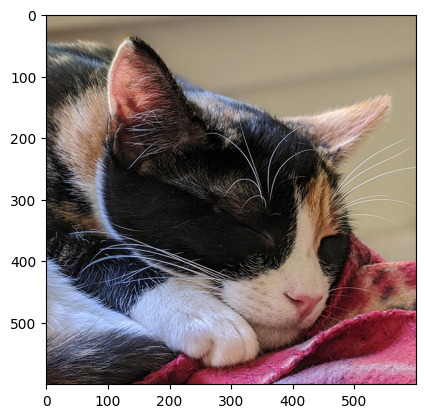

In [68]:
plt.imshow(beans)

In [69]:
beans.shape

(600, 600, 3)

In [70]:
beans[0,0,:]

array([164, 150, 124], dtype=uint8)

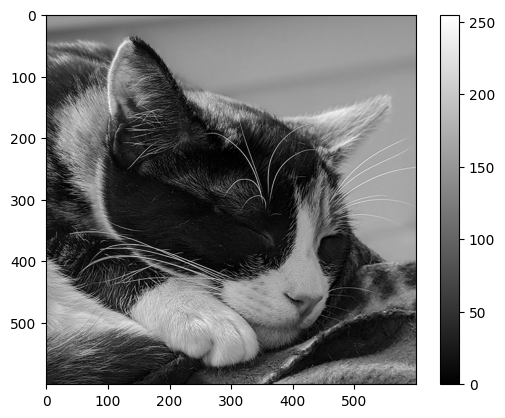

In [74]:
beans_green = beans[:,:,1]
plt.imshow(beans_green, cmap="gray")
plt.colorbar()

1. What is the dtype of the resulting array? What are the minimum and maximum values?

2. Display a binary image showing which pixels are greater than half the maximum pixel intensity (127).

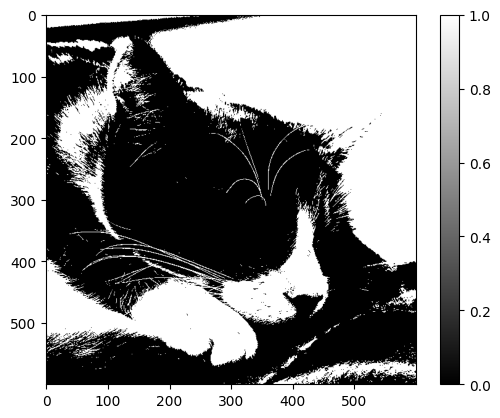

In [79]:
plt.imshow(beans_green > 127, cmap="gray")
plt.colorbar()

3. What is the average value of pixels that have intensity value above 127?

In [91]:
beans_green[beans_green > 127].mean()

np.float64(130.81223141203705)

4. Which column of the image has the highest average pixel value?

In [87]:
beans_green.mean(axis=0).argmax()

np.int64(579)